In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline

In [3]:
PATH = 'PetImages/'
CATEGORIES = ['Dog','Cat']

[[127 114 110 ...  92  95  83]
 [134 125 117 ...  88  91  85]
 [131 137 134 ...  84  88  89]
 ...
 [196 197 196 ... 153 153 145]
 [182 184 188 ... 164 160 151]
 [174 179 187 ... 168 162 153]]


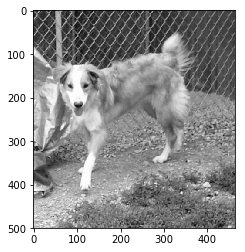

In [10]:
for categories in CATEGORIES:
    path = os.path.join(PATH,categories)
    for img in os.listdir(path): # for loop to view the image
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        print(img_array)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

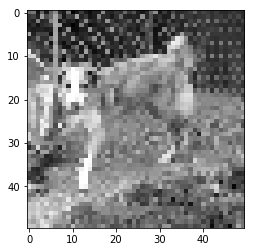

In [11]:
IMG_SIZE = 50 #resize the data so that each image is of the same size.
img_resized = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(img_resized,cmap="gray")
plt.show()

In [12]:
# create training and testing data
# classes cannot be a string therefore make it 0's and 1's
training_data = []
def create_training_data():
    for categories in CATEGORIES:
        path = os.path.join(PATH,categories)
        ctype = CATEGORIES.index(categories)
        for img in os.listdir(path): # for loop to view the image
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([img_resized,ctype])
            except Exception as e:
                pass
create_training_data()

In [13]:
print(len(training_data))

24946


In [14]:
import random 

random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
1
0
0
1
1


In [16]:
X=[] # for keras this should be a numpy array
y=[]
for features, labels in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1) # this 1 is for as the image is greyscale 1
# for color images = 3

In [17]:
import pickle

pickle_out = open("x_train","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y_train","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("x_train","rb")
X = pickle.load(pickle_in)

In [19]:
X[1]

array([[[164],
        [168],
        [173],
        ...,
        [182],
        [179],
        [177]],

       [[166],
        [170],
        [174],
        ...,
        [184],
        [180],
        [179]],

       [[166],
        [167],
        [172],
        ...,
        [184],
        [184],
        [142]],

       ...,

       [[ 97],
        [ 93],
        [ 96],
        ...,
        [ 82],
        [ 80],
        [ 99]],

       [[ 98],
        [ 92],
        [ 94],
        ...,
        [ 79],
        [ 86],
        [ 79]],

       [[100],
        [ 97],
        [ 96],
        ...,
        [ 39],
        [ 52],
        [ 36]]], dtype=uint8)